In [97]:
import numpy as np
import pandas as pd
import math

In [98]:
df = pd.read_csv('/Users/veerabhadra/Documents/Bsc.CSIT/final-year-project/Codes/spam.csv',encoding=('ISO-8859-1'))

In [99]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4332,ham,Y bishan lei... I tot ï¿½_ say lavender?,NaN,NaN,NaN
1242,ham,Nobody can decide where to eat and dad wants C...,NaN,NaN,NaN
3029,ham,"Also sir, i sent you an email about how to log...",NaN,NaN,NaN
7030,spam,CLAIRE here am havin borin time & am now alone...,NaN,NaN,NaN
8613,ham,One day a crab was running on the sea shore..T...,NaN,NaN,NaN


In [100]:
df.shape

(11167, 5)

In [101]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

## 1. Data Cleaning

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11167 entries, 0 to 11166
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          11167 non-null  object
 1   v2          11167 non-null  object
 2   Unnamed: 2  55 non-null     object
 3   Unnamed: 3  13 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 436.3+ KB


In [103]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [104]:
df.sample(5)

,v1,v2
5256,ham,Well she's in for a big surprise!
3882,ham,Gumby's has a special where a &lt;#&gt; \ che...
7684,ham,Yar he quite clever but aft many guesses lor. ...
8812,ham,Am okay. Will soon be over. All the best
5999,ham,aathi..where are you dear..


In [105]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
2106,ham,Thank you. I like you as well...
811,ham,So there's a ring that comes with the guys cos...
7922,ham,Yar else i'll thk of all sorts of funny things.
17,ham,Eh u remember how 2 spell his name... Yes i di...
7958,spam,Someone has contacted our dating service and e...


In [106]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [107]:
df['target'] = encoder.fit_transform(df['target'])

In [108]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [109]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [110]:
# check for duplicate values
df.duplicated().sum()

5425

In [111]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [112]:
df.duplicated().sum()

0

In [113]:
df.shape

(5742, 2)

## 2.EDA

In [114]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [115]:
df['target'].value_counts()

target
0    4845
1     897
Name: count, dtype: int64

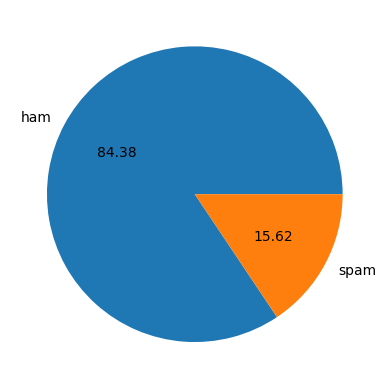

In [116]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [117]:
# Data is imbalanced

In [118]:
import nltk

In [119]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [120]:
df['num_characters'] = df['text'].apply(len)

In [121]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [122]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [123]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [124]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [125]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [126]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5742.000000,5742.000000,5742.000000
mean,82.741205,19.115639,1.998433
std,59.203730,13.453612,1.397798
min,2.000000,1.000000,1.000000
25%,37.000000,9.000000,1.000000
50%,65.000000,16.000000,2.000000
75%,126.000000,27.000000,3.000000
max,910.000000,220.000000,28.000000


In [127]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4845.000000,4845.000000,4845.000000
mean,72.233230,17.489370,1.808462
std,57.331483,13.749369,1.287385
min,2.000000,1.000000,1.000000
25%,34.000000,9.000000,1.000000
50%,54.000000,13.000000,1.000000
75%,94.000000,23.000000,2.000000
max,910.000000,220.000000,28.000000


In [128]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,897.000000,897.000000,897.000000
mean,139.498328,27.899666,3.024526
std,29.436528,6.794083,1.519758
min,3.000000,1.000000,1.000000
25%,133.000000,25.000000,2.000000
50%,150.000000,29.000000,3.000000
75%,158.000000,32.000000,4.000000
max,225.000000,46.000000,8.000000


In [129]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

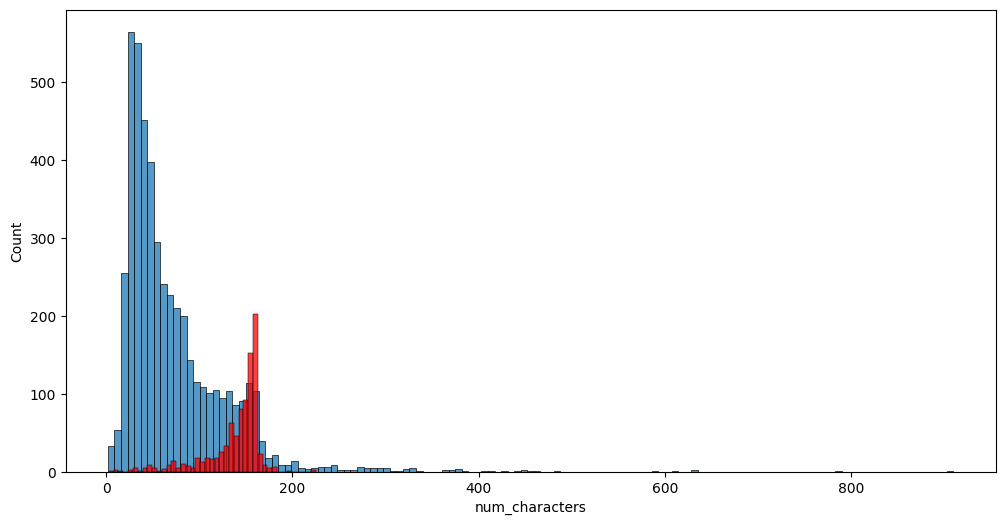

In [130]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

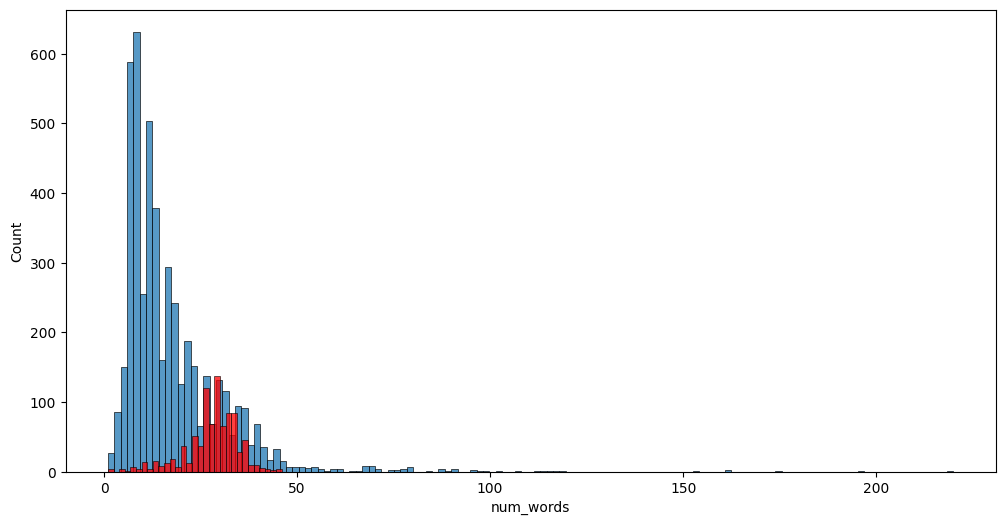

In [131]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

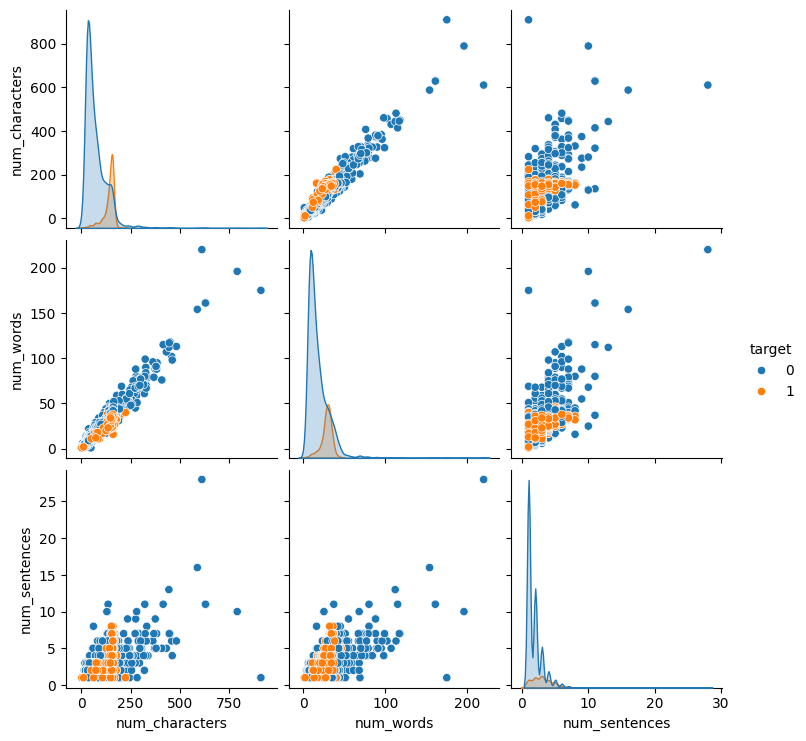

In [132]:
sns.pairplot(df,hue='target')

<Axes: >

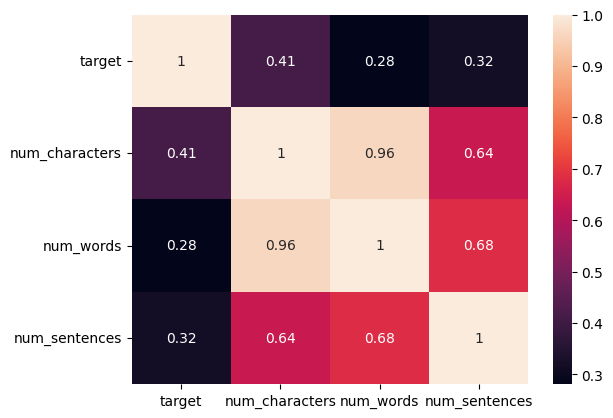

In [133]:
x=df.drop(columns=['text'])
sns.heatmap(x.corr(),annot=True)


## 3. Data Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [134]:
from nltk.corpus import stopwords
import string
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

In [135]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

### For Downloading nltk stopwords

In [136]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [137]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, ok? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight ok cri enough today'

In [138]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [139]:
df['transformed_text'] = df['text'].apply(transform_text)

In [140]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [141]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [142]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

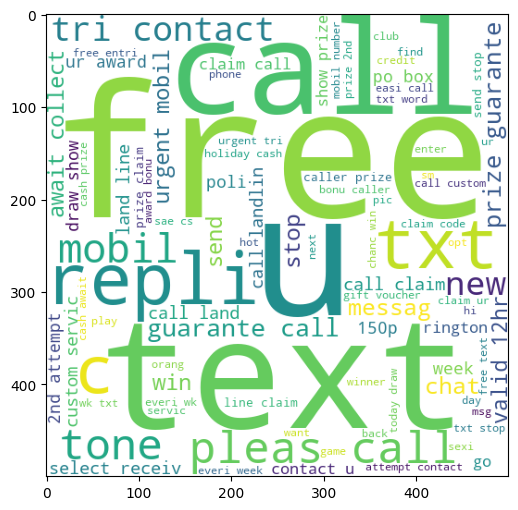

In [143]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [144]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

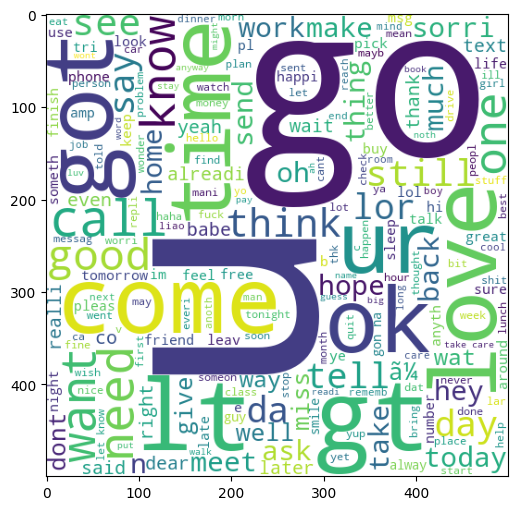

In [145]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [146]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [147]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [148]:
len(spam_corpus)

13623

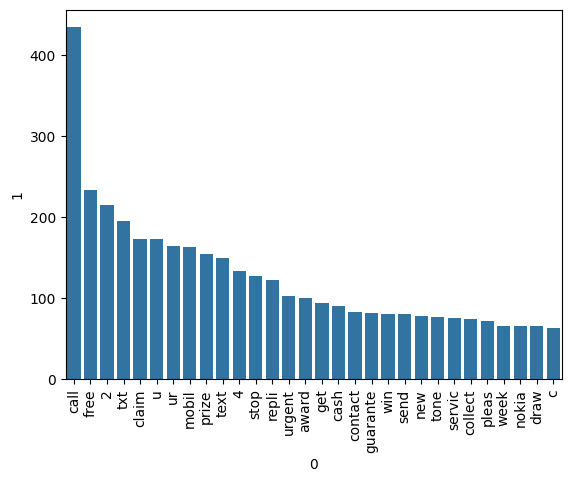

In [149]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0], y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [150]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [151]:
len(ham_corpus)

39003

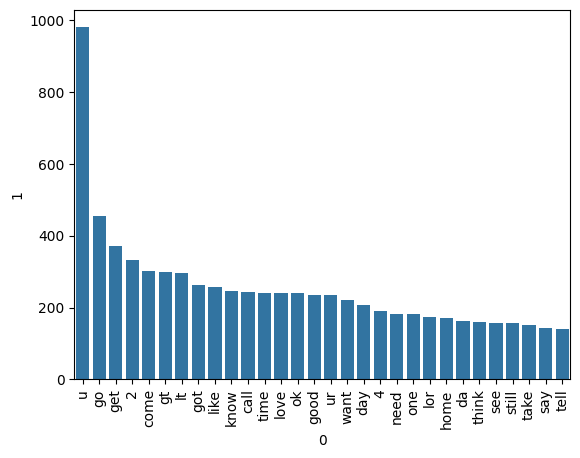

In [152]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [153]:
# Text Vectorization
# using Bag of Words
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


## 4. Model Building

TF_IDF Vectorizaton

In [154]:
from model import TFIDFVectorizer

In [155]:
tfidf_vectorizer = TFIDFVectorizer(max_features=10000)

In [156]:
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2, k=3000)
tfidf_matrix = tfidf_vectorizer.fit(df['transformed_text'])
X = tfidf_vectorizer.transform(df['transformed_text'])
X = selector.fit_transform(X, df['target'])

In [157]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [158]:
# appending the num_character col to X
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [159]:
X.shape

(5742, 3000)

In [160]:
y = df['target'].values

In [161]:
from sklearn.model_selection import train_test_split

In [162]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [163]:

from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

Multinomial Naive Bayes From Scratch

In [164]:
from model import MultinomialNB1

In [165]:
mnb = MultinomialNB1()

In [166]:
mnb.fit(X_train,y_train)
y_pred = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.9782419495213229
[[946  19]
 [  6 178]]
0.9035532994923858


Multinomial Naive Bayes from libary

In [167]:
from sklearn.naive_bayes import MultinomialNB

In [168]:
mnb1 =MultinomialNB()
mnb1.fit(X_train, y_train)
y_pred1 = mnb1.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9782419495213229
[[946  19]
 [  6 178]]
0.9035532994923858


In [169]:
# tfidf --> MNB

KNN Algorithm from Scratch

In [170]:
from model import KNN

In [171]:
knn = KNN(k=3)

In [172]:
from collections import Counter

In [173]:
knn.fit(X_train, y_train)

# Predict on the testing set
y_pred2 = knn.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))


0.906875543951262
[[965   0]
 [107  77]]
1.0


Logistic Regression Algorithm from Scratch

In [174]:
from model import LogisticRegression1

In [175]:
lrt = LogisticRegression1()
lrt.fit(X_train, y_train)

# Predict on the testing set
y_pred3 = (lrt.predict(X_test)> 0.5).astype(int)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

c:\Users\User\Desktop\spam\model.py:118: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


0.9869451697127938
[[960   5]
 [ 10 174]]
0.9720670391061452


Logistic Regression from Libary

In [176]:
from sklearn.linear_model import LogisticRegression

In [187]:
lrt1 = LogisticRegression(solver='liblinear', penalty='l1')
lrt1.fit(X_train, y_train)

# Predict on the testing set
y_pred31 = lrt1.predict(X_test)
print(accuracy_score(y_test, y_pred31))
print(confusion_matrix(y_test,y_pred31))
print(precision_score(y_test,y_pred31))

0.9834638816362054
[[960   5]
 [ 14 170]]
0.9714285714285714


DecisionTree Algorithm From scratch

In [178]:
from model import DecisionTree

In [179]:
dt1 = DecisionTree(max_depth=5)
dt1.fit(X_train, y_train)

# Predict on the testing set
y_pred4 = dt1.predict(X_test)
print(accuracy_score(y_test, y_pred4))
print(confusion_matrix(y_test,y_pred4))
print(precision_score(y_test,y_pred4))

0.9225413402959095
[[956   9]
 [ 80 104]]
0.9203539823008849


SVM algorithm from libary

In [180]:

from sklearn.svm import SVC

In [181]:
svm = SVC(kernel='sigmoid', gamma=1.0)
svm.fit(X_train, y_train)

# Predict on the testing set
y_pred4 = svm.predict(X_test)
print(accuracy_score(y_test, y_pred4))
print(confusion_matrix(y_test,y_pred4))
print(precision_score(y_test,y_pred4))

0.8833768494342907
[[897  68]
 [ 66 118]]
0.6344086021505376


In [203]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)
Z = tfidf.fit_transform(df['transformed_text']).toarray()
Z.shape
Z_train,Z_test,y_train,y_test = train_test_split(Z,y,test_size=0.2,random_state=2)


In [207]:
from sklearn.naive_bayes import MultinomialNB
mnb2 =MultinomialNB()
mnb2.fit(Z_train, y_train)
y_pred1 = mnb2.predict(Z_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9817232375979112
[[965   0]
 [ 21 163]]
1.0


In [206]:
from sklearn.linear_model import LogisticRegression
lrt2=LogisticRegression()
lrt2.fit(Z_train, y_train)

# Predict on the testing set
y_pred31 = lrt2.predict(Z_test)
print(accuracy_score(y_test, y_pred31))
print(confusion_matrix(y_test,y_pred31))
print(precision_score(y_test,y_pred31))

0.9651871192341166
[[962   3]
 [ 37 147]]
0.98


In [194]:
clfs = {
    'SVC' : svm,
    'KN' : knn, 
    'NB': mnb, 
    'DT': dt1, 
    'LR': lrt1, 
    
}

In [190]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [195]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.8833768494342907
Precision -  0.6344086021505376
For  KN
Accuracy -  0.906875543951262
Precision -  1.0
For  NB
Accuracy -  0.9782419495213229
Precision -  0.9035532994923858
For  DT
Accuracy -  0.9225413402959095
Precision -  0.9203539823008849
For  LR
Accuracy -  0.9825935596170583
Precision -  0.9659090909090909


In [198]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Accuracy',ascending=False)

In [199]:
performance_df

,Algorithm,Accuracy,Precision
4,LR,0.982594,0.965909
2,NB,0.978242,0.903553
3,DT,0.922541,0.920354
1,KN,0.906876,1.000000
0,SVC,0.883377,0.634409


In [200]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,LR,Accuracy,0.982594
1,NB,Accuracy,0.978242
2,DT,Accuracy,0.922541
3,KN,Accuracy,0.906876
4,SVC,Accuracy,0.883377
5,LR,Precision,0.965909
6,NB,Precision,0.903553
7,DT,Precision,0.920354
8,KN,Precision,1.000000
9,SVC,Precision,0.634409


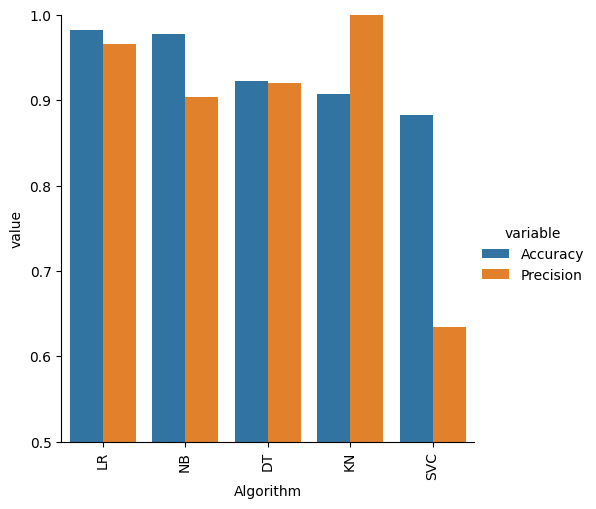

In [201]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [183]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb2,open('model.pkl','wb'))
pickle.dump(lrt2,open('model1.pkl','wb'))

In [208]:
input_sms=transform_text("Congratulations ur awarded 500 of CD vouchers or 125gift guaranteed & Free entry 2 100 wkly draw txt MUSIC to 87066 TnCs www.Ldew.com1win150ppmx3age16")
print(input_sms)
vector_input = tfidf.transform([input_sms])

congratul ur award 500 cd voucher 125gift guarante free entri 2 100 wkli draw txt music 87066 tnc


In [210]:
result = mnb2.predict(vector_input)[0]
print(result)

1
